<a href="https://colab.research.google.com/github/Wenjie0o0/ClassAI/blob/main/Class03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
batch_size=64
num_classes=10
epochs=10
learning_rate=1e-4

In [22]:
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)

In [23]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=False)

In [24]:
print(dir(train_loader))

['_DataLoader__initialized', '_DataLoader__multiprocessing_context', '_IterableDataset_len_called', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_auto_collation', '_dataset_kind', '_get_iterator', '_get_shared_seed', '_index_sampler', '_iterator', 'batch_sampler', 'batch_size', 'check_worker_number_rationality', 'collate_fn', 'dataset', 'drop_last', 'generator', 'multiprocessing_context', 'num_workers', 'persistent_workers', 'pin_memory', 'pin_memory_device', 'prefetch_factor', 'sampler', 'timeout', 'worker_init_fn']


In [25]:
iterator=iter(train_loader)

In [26]:
print(iterator.next())

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [27]:
images,labels=next(iterator)
print(images.shape,labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [28]:
print(images,labels)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

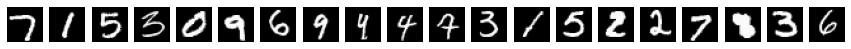

In [29]:
fig,axes=plt.subplots(1,20,figsize=(15,15))
for i in range(20):
  axes[i].imshow(images[i][0],cmap='gray')
  axes[i].set_axis_off()
fig.show()  

In [30]:
class Net(nn.Module):
  def __init__(self,input_size,h1,h2,num_classes):
    super().__init__()
    self.f1=nn.Linear(input_size,h1)
    self.f2=nn.Linear(h1,h2)
    self.f3=nn.Linear(h2,num_classes)

  def forward(self,x):
    x=F.relu(self.f1(x))
    x=F.relu(self.f2(x))
    out=self.f3(x)
    return out

In [31]:
input_size=784
h1=256
h2=128
net=Net(input_size=input_size,h1=h1,h2=h2,num_classes=num_classes).to(device)

In [32]:
[p.numel() for p in net.parameters() if p.requires_grad]

[200704, 256, 32768, 128, 1280, 10]

In [33]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(net.parameters(),lr=learning_rate)

In [36]:
total_steps=len(train_loader)
for epoch in range(epochs):
  for i,(images,labels) in enumerate(train_loader):
    images=images.view(-1,28*28).to(device)
    labels=labels.to(device)

    outputs=net(images)
    loss=criterion(outputs,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%100==0:
      print (f'Epoch {epoch+1}, Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

Epoch 1, Step [100/938], Loss: 1.7014
Epoch 1, Step [200/938], Loss: 0.8668
Epoch 1, Step [300/938], Loss: 0.4899
Epoch 1, Step [400/938], Loss: 0.3798
Epoch 1, Step [500/938], Loss: 0.4410
Epoch 1, Step [600/938], Loss: 0.3726
Epoch 1, Step [700/938], Loss: 0.5908
Epoch 1, Step [800/938], Loss: 0.4221
Epoch 1, Step [900/938], Loss: 0.3511
Epoch 2, Step [100/938], Loss: 0.3752
Epoch 2, Step [200/938], Loss: 0.1860
Epoch 2, Step [300/938], Loss: 0.4670
Epoch 2, Step [400/938], Loss: 0.2087
Epoch 2, Step [500/938], Loss: 0.1618
Epoch 2, Step [600/938], Loss: 0.1633
Epoch 2, Step [700/938], Loss: 0.2778
Epoch 2, Step [800/938], Loss: 0.3892
Epoch 2, Step [900/938], Loss: 0.1590
Epoch 3, Step [100/938], Loss: 0.4251
Epoch 3, Step [200/938], Loss: 0.1367
Epoch 3, Step [300/938], Loss: 0.4457
Epoch 3, Step [400/938], Loss: 0.3123
Epoch 3, Step [500/938], Loss: 0.2904
Epoch 3, Step [600/938], Loss: 0.2202
Epoch 3, Step [700/938], Loss: 0.3749
Epoch 3, Step [800/938], Loss: 0.2806
Epoch 3, Ste

In [41]:
with torch.no_grad():
  n_correct=0
  n_samples=0
  for images,labels in test_loader:
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    outputs=net(images)
    _,prediction=torch.max(outputs,1)
    n_samples+=labels.size(0)
    n_correct+=(prediction==labels).sum().item()
    acc=100.0*n_correct/n_samples
    print(f'Accuracy of the network on the 10000 test images:{acc}%')

64
Accuracy of the network on the 10000 test images:98.4375%
128
Accuracy of the network on the 10000 test images:98.4375%
192
Accuracy of the network on the 10000 test images:97.39583333333333%
256
Accuracy of the network on the 10000 test images:97.265625%
320
Accuracy of the network on the 10000 test images:97.8125%
384
Accuracy of the network on the 10000 test images:98.17708333333333%
448
Accuracy of the network on the 10000 test images:97.99107142857143%
512
Accuracy of the network on the 10000 test images:97.65625%
576
Accuracy of the network on the 10000 test images:97.74305555555556%
640
Accuracy of the network on the 10000 test images:97.8125%
704
Accuracy of the network on the 10000 test images:97.86931818181819%
768
Accuracy of the network on the 10000 test images:97.78645833333333%
832
Accuracy of the network on the 10000 test images:97.71634615384616%
896
Accuracy of the network on the 10000 test images:97.43303571428571%
960
Accuracy of the network on the 10000 test imag